In [49]:
#Etienne Pham Do 40130483
#COMP 333 Lab Assignment 3
# Create a Jupyter notebook using Python code and any of its libraries, but especially pandas,
# to wrangle the ecological data of Lab 8.
import pandas as pd

#csv file from https://datacarpentry.org/OpenRefine-ecology-lesson/
df = pd.read_csv('Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")
df.head(10)

C:\Users\etpha\AppData\Local\Temp/ipykernel_31420/1960873532.py:3: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13851c71-013d-4989-bd49-7d7a65af7709,7645,4,16,1983,67.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,c10df07b-ca12-450f-8240-94e146dea1d1,8641,11,13,1983,74.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,13.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1bd57490-6747-4949-8f98-ad6faced7341,9495,8,26,1984,82.0,aab65971-f64b-425e-9a78-17d7ec63423c,9,13.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,723e792b-9f69-4d7a-84c6-d1c1ee66ea63,9583,9,30,1984,83.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,13.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,b7202dd9-332a-41f0-a975-56c55f803164,9862,1,20,1985,86.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#text facet
def get_text_facet(col_name):
    return df[col_name].value_counts().sort_index()
    
print(get_text_facet('scientificName'))

  Amphispiza bilineata                 1
  Amphispiza bilineata                 1
Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 289
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys spectabilis               2504
Dipodomys sp.                         40
Emphispiza bilin

1977     503
1978    1048
1979     719
1980    1415
1981    1472
1982    1978
1983    1673
1984     981
1985    1438
1986     942
1987    1671
1988    1469
1989    1569
1990    1311
1991    1347
1992    1038
1993     750
1994     668
1995    1222
1996    1706
1997    2493
1998    1610
1999    1135
2000    1552
2001    1610
2002    2229
Name: yr, dtype: int64


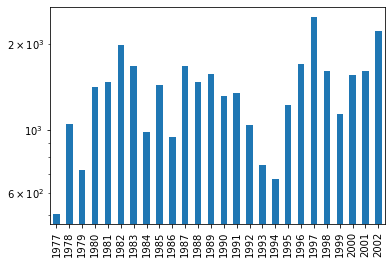

In [51]:
#numeric facet
def get_numeric_facet(col_name, use_log_scaling = False):
    if df[col_name].dtype.kind in 'iufc':
        numeric_df = get_text_facet(col_name)
        numeric_df.plot.bar(logy = use_log_scaling)
        print(numeric_df)
    else:
        print('error: not numeric')

get_numeric_facet('yr', True)

In [52]:
#trimming trailing and internal whitespaces
import re
def trim_whitespaces():
    return df.applymap(lambda x: re.sub('[\s+]', ' ', x).strip() if isinstance(x, str) else x)
df = trim_whitespaces()
print(get_text_facet('scientificName'))

Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 291
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys sp.                         40
Dipodomys spectabilis               2504
Emphispiza bilinata                    2
Onychomys leucogaster               1006
Onychomys sp.   

In [53]:
#clustering column
from sklearn.cluster import AffinityPropagation
import distance
import numpy as np

def cluster_column(column_name):
    column_values = df[column_name].unique()
    column_values = np.asarray(list(filter(lambda x: pd.isnull(x) == False , column_values)))
    if not all(isinstance(x, str) for x in column_values):
        return
    print('gonna calculate clusters')
    #clustering using levenshtein distance
    lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in column_values] for w2 in column_values])
    aff_prop = AffinityPropagation(affinity="precomputed", damping=0.5)
    aff_prop.fit(lev_similarity)
    print('calculating clusters done')
    for cluster_id in np.unique(aff_prop.labels_):
        new_col_name = column_values[aff_prop.cluster_centers_indices_[cluster_id]]
        #finding all similar strings to cluster center
        cluster = np.unique(column_values[np.nonzero(aff_prop.labels_==cluster_id)])
        print(new_col_name)
        print(cluster)
        #replacing the old column value with new
        for x in cluster:
            df.loc[df[column_name] == x, column_name] = new_col_name
    print('clustering done')    
cluster_column('scientificName')
print(get_text_facet('scientificName'))

gonna calculate clusters
calculating clusters done
Amphispiza bilineata
1
['Amphespiza bilineata' 'Amphispiza bilineata' 'Amphispiza bilineatus'
 'Amphispiza cilineata' 'Amphispizo bilineata' 'Calamospiza melanocorys'
 'Callipepla squamata' 'Emphispiza bilinata']
Ammospermophilus harrisi
1
['Ammospermophilis harrisi' 'Ammospermophilus harrisi'
 'Ammospermophilus harrisii']
Campylorhynchus brunneicapillus
1
['Campylorhynchus brunneicapillus']
Cnemidophorus tigris
1
['Cnemidophorus tigris' 'Cnemidophorus uniparens']
Crotalus scutalatus
1
['Ammodramus savannarum' 'Crotalus scutalatus' 'Crotalus viridis']
Dipodomys ordii
1
['Baiomys taylori' 'Chaetodipus baileyi' 'Dipodomys merriami'
 'Dipodomys ordii' 'Dipodomys spectabilis']
Onychomys sp.
1
['Dipodomys sp.' 'Onychomys leucogaster' 'Onychomys sp.'
 'Onychomys torridus']
clustering done
Ammospermophilus harrisi             437
Amphispiza bilineata                 305
Campylorhynchus brunneicapillus        1
Cnemidophorus tigris            

C:\Users\etpha\miniconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
